<a href="https://colab.research.google.com/github/SK-Faizan-Nasir/Diabetes_Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download dataset from : https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
data = pd.read_csv("diabetes.csv")


In [ ]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
countT,countF=0,0
for i in data['Outcome']:
  if i==1:
    countT=countT+1
  else:
    countF=countF+1

In [ ]:
print("Diabetic Patients",countT)
print("Non-Diabetic Patients",countF)

Diabetic Patients 268
Non-Diabetic Patients 500


Text(0.5, 0, 'Diabetic vs Non-Diabetic')

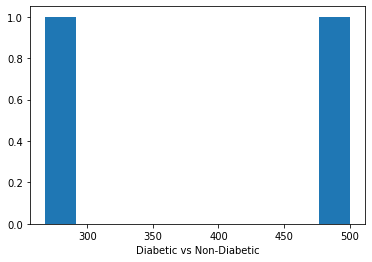

In [ ]:
plt.hist([countT,countF])
plt.xlabel("Diabetic vs Non-Diabetic")

In [ ]:
data.shape


(768, 9)

In [ ]:
# check if any null value is present
data.isnull().values.any()

False

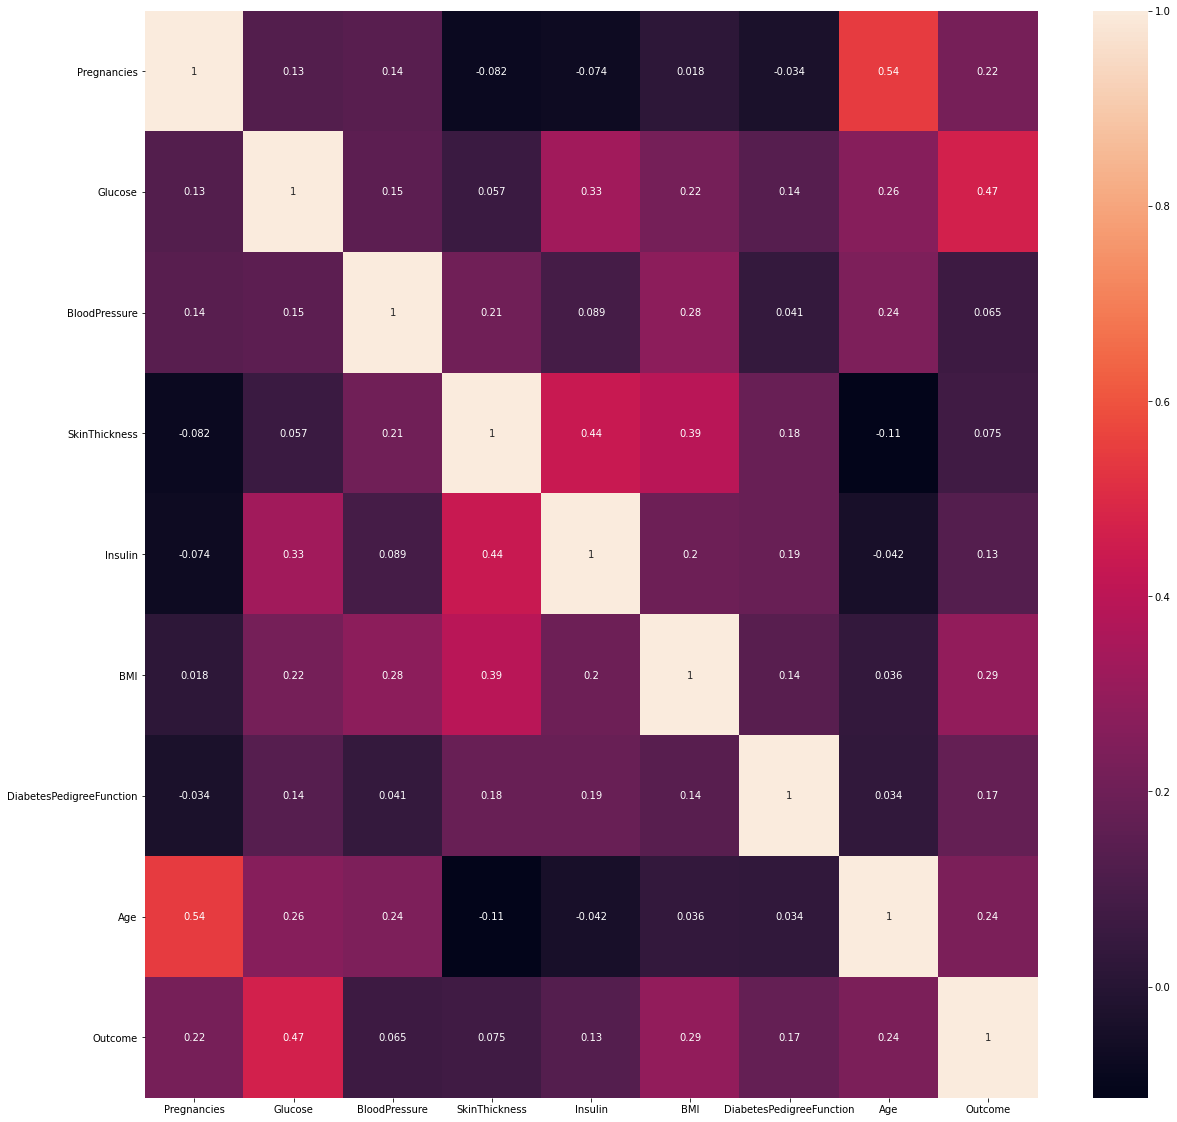

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True)

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
Y=data["Outcome"]
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
X=data.drop("Outcome",axis=1)

In [ ]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [ ]:
X=X.astype(float)

In [ ]:
X.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
dtype: object

In [ ]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0


In [ ]:
lst=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]

In [ ]:
for i in lst:
  tem=X[i]
  mean=X[i].mean()
  for j in range(len(tem)):
    if tem[j]==0:
      tem[j]=mean
  X.replace(i,tem,inplace=True)

  
  

In [ ]:
X.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.000000,35.000000,79.799479,33.600000,0.627,50.0
1,1.0,85.0,66.000000,29.000000,79.799479,26.600000,0.351,31.0
2,8.0,183.0,64.000000,20.536458,79.799479,23.300000,0.672,32.0
3,1.0,89.0,66.000000,23.000000,94.000000,28.100000,0.167,21.0
4,0.0,137.0,40.000000,35.000000,168.000000,43.100000,2.288,33.0
5,5.0,116.0,74.000000,20.536458,79.799479,25.600000,0.201,30.0
6,3.0,78.0,50.000000,32.000000,88.000000,31.000000,0.248,26.0
7,10.0,115.0,69.105469,20.536458,79.799479,35.300000,0.134,29.0
8,2.0,197.0,70.000000,45.000000,543.000000,30.500000,0.158,53.0
9,8.0,125.0,96.000000,20.536458,79.799479,31.992578,0.232,54.0


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=2,test_size=0.15)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
n=16
acc_lst=[]
for i in range(2,n):
  clf_knn=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
  pred_knn=clf_knn.predict(x_test)
  acc_lst.append(accuracy_score(y_test,pred_knn))
acc_lst=np.asarray(acc_lst)
print("Max accuracy {} found at n_neighbors={}".format(acc_lst.max(),acc_lst.argmax()+2))


Max accuracy 0.8017241379310345 found at n_neighbors=10


In [ ]:
clf_knn=KNeighborsClassifier(n_neighbors=10).fit(x_train,y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
print("Cross validation Scores:",cross_val_score(clf_knn,X,Y,cv=10))
print("Mean accuracy:",cross_val_score(clf_knn,X,Y,cv=10).mean())


Cross validation Scores: [0.7012987  0.76623377 0.68831169 0.68831169 0.71428571 0.75324675
 0.74025974 0.79220779 0.72368421 0.81578947]
Mean accuracy: 0.7383629528366371


In [ ]:
from sklearn.svm import SVC
clf_svm=SVC(kernel='poly').fit(x_train,y_train)
pred_svm=clf_svm.predict(x_test)
accuracy_score(y_test,pred_svm)

0.7672413793103449

In [ ]:
cross_val_score(clf_svm,X,Y,cv=10).mean()

0.7539131920710868

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(criterion="entropy",min_samples_split=3).fit(x_train,y_train)
pred_rf=clf_rf.predict(x_test)
accuracy_score(y_test,pred_rf)

0.8017241379310345

In [ ]:
cross_val_score(clf_rf,X,Y,cv=10).mean()

0.7539131920710869

Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
#number of trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_clf=RandomForestClassifier()
rf_hp=RandomizedSearchCV(estimator = rf_clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_hp.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_hp.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf_hp.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
rf_hp.best_score_

0.7730027198804944

In [ ]:
clf_rf=RandomForestClassifier(bootstrap= True,max_depth= 60,max_features= 'sqrt',min_samples_leaf= 2,min_samples_split= 2,n_estimators=1000)

In [ ]:
clf_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_rf=clf_rf.predict(x_test)
accuracy_score(y_test,pred_rf)

0.7758620689655172

In [ ]:
cr=cross_val_score(clf_rf,X,Y,cv=10)
cr

array([0.67532468, 0.77922078, 0.75324675, 0.67532468, 0.72727273,
       0.79220779, 0.83116883, 0.84415584, 0.69736842, 0.81578947])

In [ ]:
cr.mean()

0.7591079972658921

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
clf_xgb=XGBClassifier().fit(x_train,y_train)
pred_xgb=clf_xgb.predict(x_test)
accuracy_score(y_test,pred_xgb)

0.7413793103448276

In [ ]:
cr=cross_val_score(clf_xgb,X,Y,cv=10)
cr.mean()

0.7487012987012986

In [ ]:

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
import xgboost
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,Y.ravel())

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           verbosity=1),
                   iid='deprecated', n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0

In [ ]:
random_search.best_score_

0.835319357092942

In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 7}

In [ ]:
clf_xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clf_xgb.fit(x_train,y_train)
pred_xgb=clf_xgb.predict(x_test)
accuracy_score(y_test,pred_xgb)

0.7672413793103449

In [ ]:
cr=cross_val_score(clf_xgb,X,Y,cv=10)
cr.mean()

0.7564764183185237